In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("Life Expectancy Data.csv")

# 1. Cleaning

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

##### There are some flaws in this dataset. First, the names of columns are inconsistent. Second, the column `Non - Null Count` shows that there are some missing values.

## a. Correct names of columns

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
df.columns=df.columns.str.strip().str.title()
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'Bmi', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'Hiv/Aids', 'Gdp', 'Population', 'Thinness  1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

In [9]:
df.rename(columns={'Bmi':'BMI','Hiv/Aids':'HIV/AIDS','Gdp':'GDP'},inplace=True)

In [10]:
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

## b. Missing values

In [13]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life Expectancy                     10
Adult Mortality                     10
Infant Deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-Five Deaths                    0
Polio                               19
Total Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness  1-19 Years                34
Thinness 5-9 Years                  34
Income Composition Of Resources    167
Schooling                          163
dtype: int64

###### Replace missing values by mean value of the others

In [14]:
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

In [15]:
cols_to_fill=['Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling']

In [16]:
df[cols_to_fill]=df[cols_to_fill].fillna(df[cols_to_fill].mean())

In [17]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life Expectancy                    0
Adult Mortality                    0
Infant Deaths                      0
Alcohol                            0
Percentage Expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-Five Deaths                  0
Polio                              0
Total Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness  1-19 Years               0
Thinness 5-9 Years                 0
Income Composition Of Resources    0
Schooling                          0
dtype: int64

# 2. Visualizations

###### We will work with the numeric data, stored in the dataframe `num_df`

In [18]:
num_df=df[cols_to_fill]
num_df.head()

,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<AxesSubplot:>

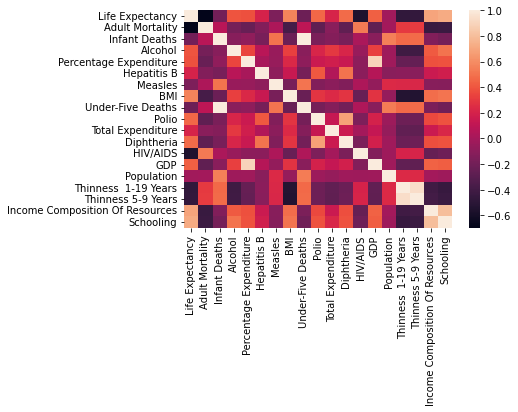

In [19]:
sns.heatmap(num_df.corr())

###### The correlation between `Infant Deaths` and `Under-Five Deaths` is quite trivial. There are 4 correlation worth considered, 

- `Life Expectancy` vs `Income Composition Of Resources`
- `Life Expectancy` vs `Schooling`
- `Income Composition Of Resources` vs `Schooling`
- `GDP` vs `Percentage Expenditure`

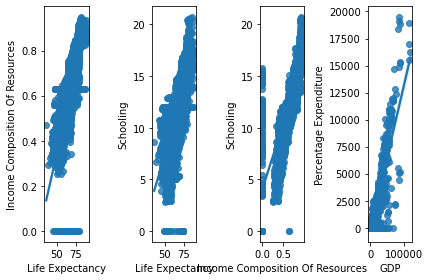

In [37]:
fig,ax=plt.subplots(ncols=4,nrows=1)
sns.regplot(x=num_df['Life Expectancy'],y=num_df['Income Composition Of Resources'],ax=ax[0])
sns.regplot(x=num_df['Life Expectancy'],y=num_df['Schooling'],ax=ax[1])
sns.regplot(x=num_df['Income Composition Of Resources'],y=num_df['Schooling'],ax=ax[2])
sns.regplot(x=num_df['GDP'],y=num_df['Percentage Expenditure'],ax=ax[3])
plt.tight_layout()

###### We will work with `GDP` and `Percentage Expenditure`

In [42]:
len(num_df['GDP'].values)

2938

In [43]:
len(num_df['Percentage Expenditure'].values)

2938

<AxesSubplot:xlabel='GDP', ylabel='Percentage Expenditure'>

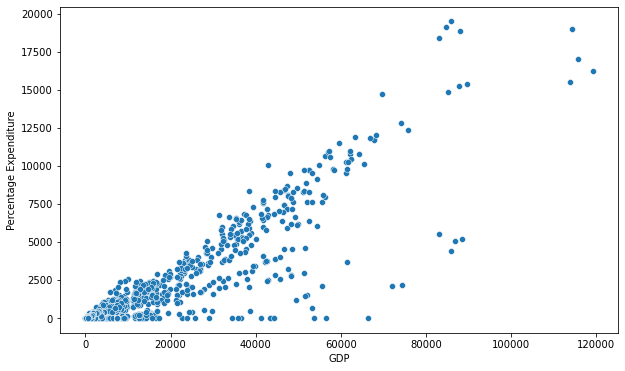

In [30]:
fig=plt.figure(figsize=(10,6))
sns.scatterplot(x=num_df['GDP'], y=num_df['Percentage Expenditure'])

<AxesSubplot:xlabel='GDP', ylabel='Percentage Expenditure'>

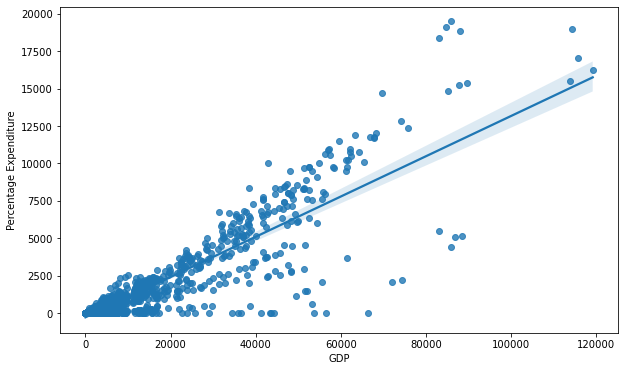

In [31]:
fig=plt.figure(figsize=(10,6))
sns.regplot(x=num_df['GDP'],y=num_df['Percentage Expenditure'])